In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from isaac.visualization import plot_lineplot_with_paper_style, smooth_out_rl_stats

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
model_directory = "models/grab_a_puck/"
data_directory = "grab_a_puck_plots/"

In [3]:
stats = pd.read_hdf(data_directory+"training_data.h5", "training_data")

In [4]:
stats.head()

,control,correct_answer,episode_length,question_loss,value_loss,seed
0,1,False,51,0,"tensor(0.2797, device='cuda:0')",0
1,0,False,600,0,"tensor(0.1392, device='cuda:0')",0
0,1,False,519,0,"tensor(0.0227, device='cuda:0')",42
1,0,False,600,0,"tensor(0.0184, device='cuda:0')",42
0,0,False,600,0,"tensor(0.0179, device='cuda:0')",72


In [5]:
columns = ["control", "episode_length", "value_loss"]
rolling_stats = smooth_out_rl_stats(stats, columns)

No handles with labels found to put in legend.


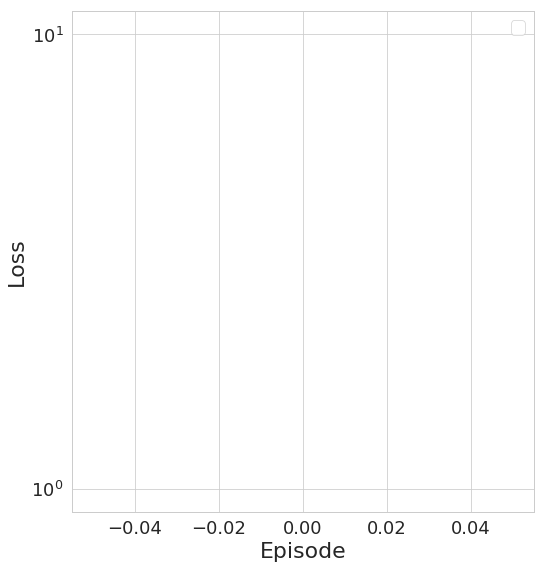

In [6]:
ax = plot_lineplot_with_paper_style(None, x="Episode", y="value_loss", markers=True, data=rolling_stats, linewidth=3, ci="sd")
ax.set_yscale("log")
plt.ylabel("Loss")
plt.savefig(data_directory+"loss.pdf")

No handles with labels found to put in legend.


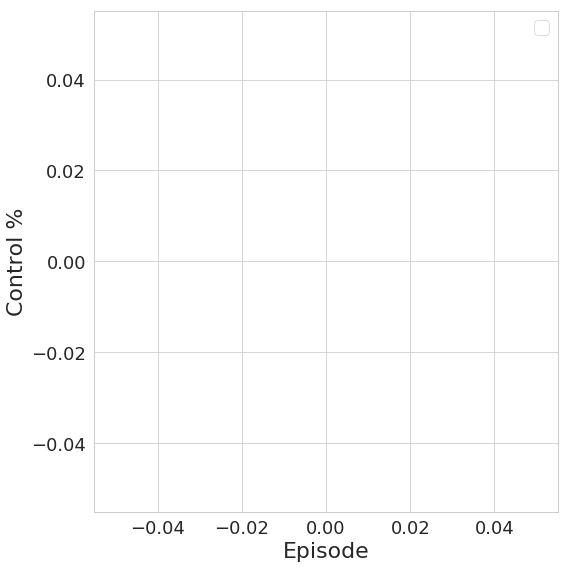

In [7]:
ax = plot_lineplot_with_paper_style(None, x="Episode", y="control", markers=True, data=rolling_stats, linewidth=3, ci="sd")
plt.ylabel("Control %")
plt.savefig(data_directory+"control.pdf")

No handles with labels found to put in legend.


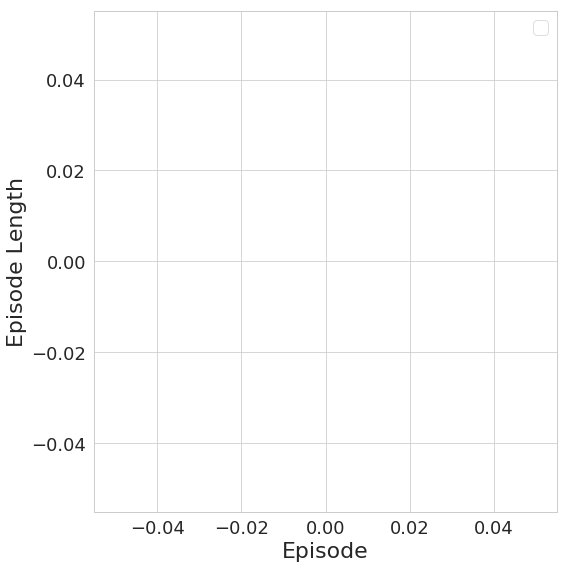

In [8]:
ax = plot_lineplot_with_paper_style(None, x="Episode", y="episode_length", markers=True, data=rolling_stats, linewidth=3, ci="sd")
plt.ylabel("Episode Length")
plt.savefig(data_directory+"episode_length.pdf")

# Validation data

In [9]:
stats = pd.read_hdf(data_directory+"validation_data.h5", "validation_data")

In [10]:
stats.episode = stats.episode.astype(int)
stats.seed = stats.seed.astype(int)

No handles with labels found to put in legend.


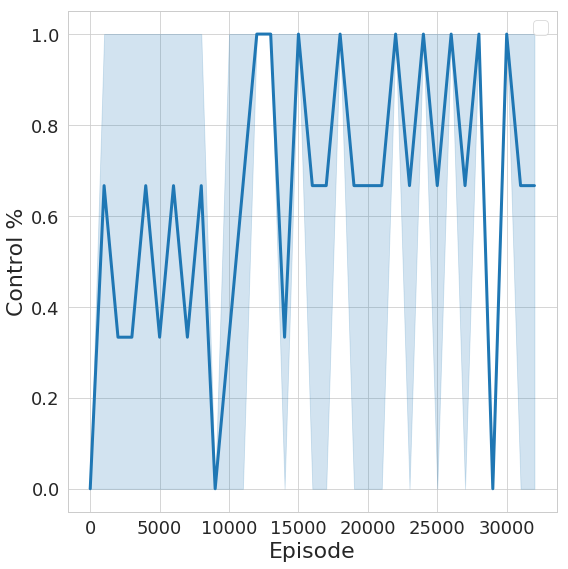

In [11]:
plt.xticks(ticks=np.arange(0, stats.episode.max(), 5000), labels=np.arange(0, stats.episode.max(), 5000))
ax = plot_lineplot_with_paper_style(None, x="episode", y="avg_control", data=stats, linewidth=3)
plt.ylabel("Control %")
plt.xlabel("Episode")
plt.savefig(data_directory+"validation_control.pdf")

In [12]:
stats.sort_values(by="avg_control", ascending=False).iloc[0]

avg_control               1.0
avg_episode_length      219.0
std_control               0.0
std_episode_length        0.0
seed                      0.0
episode               32000.0
Name: 0, dtype: float64

No handles with labels found to put in legend.


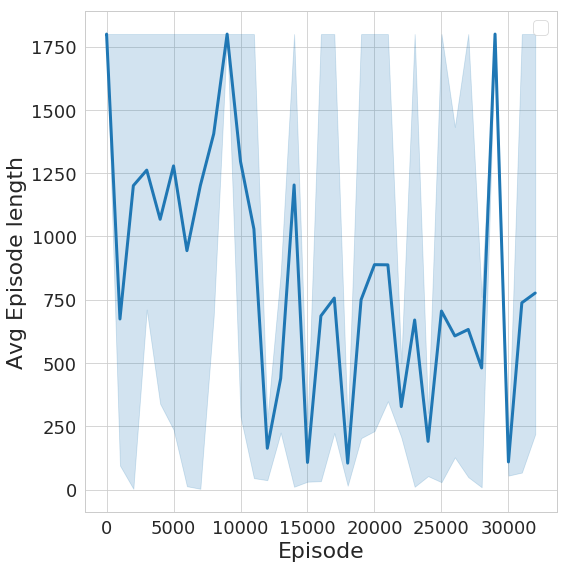

In [13]:
plt.xticks(ticks=np.arange(0, stats.episode.max(), 5000), labels=np.arange(0, stats.episode.max(), 5000))
ax = plot_lineplot_with_paper_style(None, x="episode", y="avg_episode_length", data=stats, linewidth=3)
plt.ylabel("Avg Episode length")
plt.xlabel("Episode")
plt.savefig(data_directory+"validation_ep_length.pdf")